# This is a header!
## This is a subheader!
### This is a subsubheader

DEBUG:root:base value_counts:
1    34
2     3
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
DEBUG:root:base value_counts:
1    30
2     5
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
DEBUG:root:base value_counts:
1    30
2     5
IN

Distribution of equal paths with flow label 0:
Distribution of equal paths with flow label 255:
Distribution of equal paths with flow label 65280:
Distribution of equal paths with flow label 983040:
Distribution of equal paths with flow label 1048575:


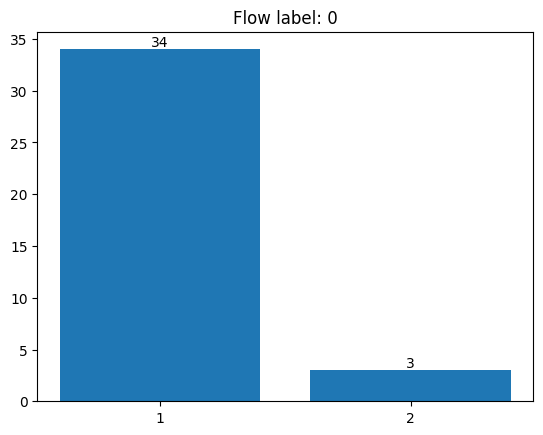

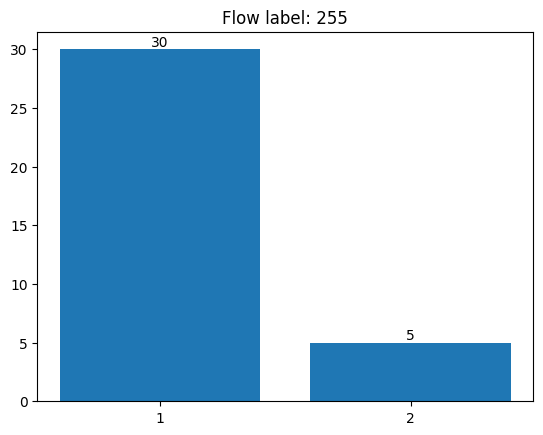

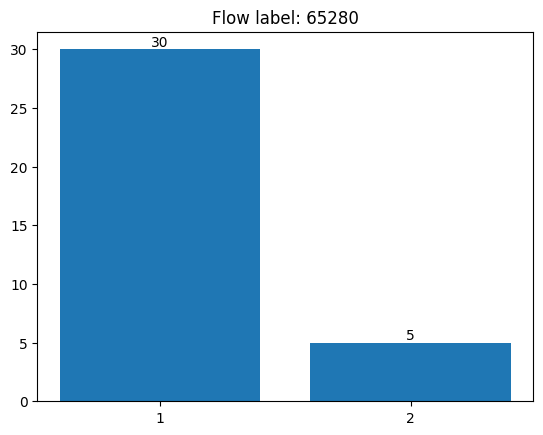

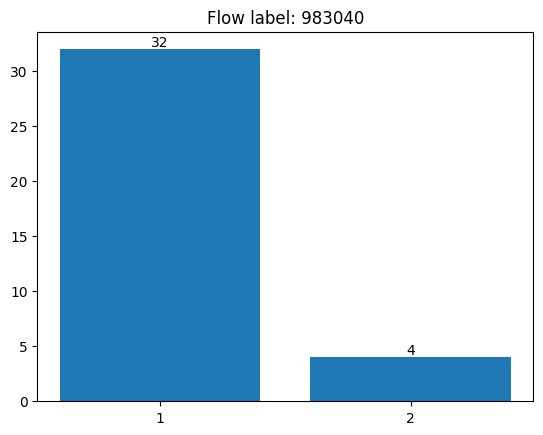

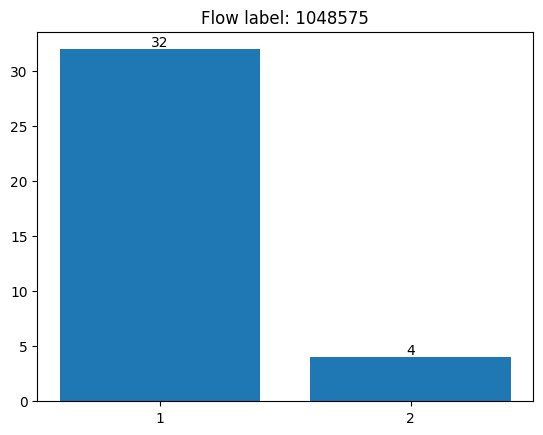

In [31]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from os.path import expanduser
from lib.definitions.classdefinitions import *
import lib.plot as plot
import lib.filter as filter
import lib.compare as scmp
import lib.sqlite_load as sq
import prettyprinter as pp
import pandas as pd
import logging
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

source_flow_labels = [0, 255, 65280, 983040, 1048575]
home = expanduser("~")
# Large data:
#db_dir = home + "/db-storage/large-data/*.db"
#db_path = home + "/db-storage/large-data/db-ubuntu-ams3-0-2023-01-19T23_00_25Z.db"
# Test/small data:
db_dir = home + "/git/scripts/stats/sample-data/db/*.db"
db_path = home + "/git/scripts/stats/sample-data/db/db-ubuntu-fra1-0-2023-01-22T17_04_15Z.db"
df: pd.DataFrame = sq.load_single(db_path)
#fl_idx = 0
#flow_label = source_flow_labels[fl_idx]
for flow_label in source_flow_labels:
    print(f"Distribution of equal paths with flow label {flow_label}:")
    dist = filter.get_distribution_of_equal_paths_to_destination(
        df, flowlabel=flow_label)
    fig, ax = plt.subplots()
    bars = ax.bar([str(i) for i in dist.index], dist)
    ax.bar_label(bars)
    plt.title(f"Flow label: {flow_label}")

DEBUG:root:base value_counts:
1    34
2     3


Distribution of equal paths with flow label 0:


Text(0.5, 1.0, 'Flow label: 0')

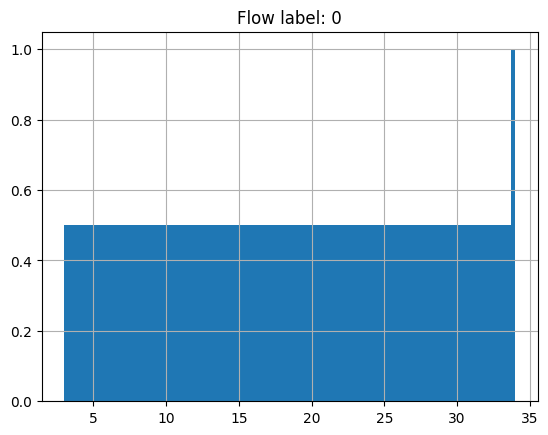

In [30]:
flow_label = source_flow_labels[0]
print(f"Distribution of equal paths with flow label {flow_label}:")
dist = filter.get_value_counts(
    df, flowlabel=flow_label)
dist.hist(cumulative=True, density=1, bins=100)
#fig, ax = plt.subplots()
#bars = ax.bar([str(i) for i in dist.index], dist)
#ax.bar_label(bars)
plt.title(f"Flow label: {flow_label}")